# Determine the location to set up Kaya Toast outlets in Singapore 


## Introduction/Business Problem

#### Introduction

Singapore is a city-state in Southeast Asia. Founded as a British trading colony in 1819, since independence it has become one of the world's most prosperous, tax-friendly countries and boasts the world's busiest port. Combining the skyscrapers and subways of a modern, affluent city with a medley of Chinese, Malay and Indian influences along with a tropical climate, tasty food from hawker centres, copious shopping malls, and vibrant night-life scene, this Garden City makes a great stopover or springboard into the region.


![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f9/Marina_Bay_Sands_in_the_evening_-_20101120.jpg/2560px-Marina_Bay_Sands_in_the_evening_-_20101120.jpg "Title")

The Mass Rapid Transit, abbreviated and referred to in local parlance as the MRT, is a metro network in Singapore, spanning most of the city-state's main island. 
![alt text](http://3.bp.blogspot.com/-m9o0hlFJRIc/U0yl-QHC9QI/AAAAAAAAASQ/ptvDSrplR9w/s1600/20131230050304!MRT_map_2017.png "MRT")


#### Business problem

Kaya Toast is a very popular breakfast dish in Singapore. The store location is a critical factor contributing to the success of each store. 

In this project, we are creating a hypothetical scenario to help the business owners, who have just gotten their franchise for Kaya Toast, to determine the ideal location to open several Kaya Toast stores. The target customers are local residents who would like to have a quick simple breakfast, hence the stakeholders decided to open the new store in a location in close proximity to a MRT station as it is convenient for people to have breakfast in the morning.


![alt text](https://c1.staticflickr.com/9/8525/28278007520_04fdc9397d_b.jpg "Title")

The aim of this project is to identify the potential MRT stations where most frequent passengers are local residents in order to open the Kaya Toast outlets. We will explore and cluster the MRT stations in Singapore based on the most common places captured from Foursquare. We will study in details the area classification using Foursquare data and machine learning segmentation and clustering. 


## Data

In this project, we will analyze the following datasets:
- List of MRT stations in Singapore and their geospatial data. 

     This dataset was downloaded from https://data.world/hxchua/train-stations-in-singapore . 

     The file is also uploaded to my github for references (file name: `mrtsg.csv`).
     
    
- List of venues by categories around each MRT stations using Foursquare API. 

     By using this API we will get all the venues within proximity to the MRT stations. 


 ## Methodology
 
In this study, we will follow the analysis approach:

- Data collection
    - Retrieve the list of MRT station in Singapore
    - Using Foursquare API: retrieve the names, categories, latitude and longitude of top 100 venues within 500 meters radius from each MRT station


- Data Processing
    - Check the numbers of unique categories from these venues
    - Group the venues by MRT stations and taking the mean on the frequency of visits of each venue category.
    

- Clustering with K-means


- Visualizing the clustering results 


- Examining the characteristics of each cluster to identify the most potential cluster


 
 

In [100]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library



In [224]:


#from IPython.display import HTML

#HTML('''<script>
#code_show=true; 
#function code_toggle() {
# if (code_show){
# $('div.input').hide();
# } else {
# $('div.input').show();
# }
# code_show = !code_show
#} 
#$( document ).ready(code_toggle);
#</script>
#<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


## Data Collection

### List of MRT stations



In [102]:
# Loading the dataset

df_mrt = pd.read_csv('mrtsg.csv')


An initial look at the data shows that there are 187 rows of data each with 8 attributes. i.e. there are 187 MRT stations with their latitude and longitude in this dataset. 

A sample of the MRT dataset is given below:

In [103]:
df_mrt.head()

,OBJECTID,STN_NAME,STN_NO,X,Y,Latitude,Longitude,COLOR
0,12,ADMIRALTY MRT STATION,NS10,24402.1063,46918.1131,1.440585,103.800998,RED
1,16,ALJUNIED MRT STATION,EW9,33518.6049,33190.0020,1.316433,103.882893,GREEN
2,33,ANG MO KIO MRT STATION,NS16,29807.2655,39105.7720,1.369933,103.849553,RED
3,81,BAKAU LRT STATION,SE3,36026.0821,41113.8766,1.388093,103.905418,OTHERS
4,80,BANGKIT LRT STATION,BP9,21248.2460,40220.9693,1.380018,103.772667,OTHERS


### List of venues data using Foursquare API

#### Use geopy library to get the latitude and longitude values of Singapore City.

In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent sg_explorer, as shown below.

In [104]:
address = 'Singapore, SG'

geolocator = Nominatim(user_agent="sg_explorer")
#location = geolocator.geocode(address)

latitude = 1.340863
longitude = 103.830391822121

#latitude = location.latitude
#longitude = location.longitude
print('The geograpical coordinate of Singapore City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Singapore City are 1.340863, 103.830391822121.


### Create a map of Singapore with MRT stations superimposed on top

In [106]:
neighborhoods = df_mrt 
neighborhoods = df_mrt.rename(columns={"COLOR": "MRT_line"})

# create map of Toronto using latitude and longitude values
map_singapore = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['MRT_line'], neighborhoods['STN_NAME']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_singapore)  
    
map_singapore

Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

### Define Foursquare Credentials and Version

In [107]:
CLIENT_ID = 'AUFFRJKVOJAJX3N5XOD0V2D1HM2Q5JSPWXEK0MNMR1V12AVN' # your Foursquare ID
CLIENT_SECRET = 'DM44B1ZJGLLJ3L51CIZQ0HZLITRBPIPIBR4BZU5V1L3XDPWZ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

Let's explore the first neighborhood in our dataframe.



In [108]:
downtown_data = neighborhoods
downtown_data.loc[0, 'STN_NAME']

neighborhood_latitude = downtown_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = downtown_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = downtown_data.loc[0, 'STN_NAME'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of ADMIRALTY MRT STATION are 1.4405850009999999, 103.80099820000001.


Now, let's get the top 100 venues that are in Singapore within a radius of 500 meters.


In [109]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

In [110]:
results = requests.get(url).json()

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

#print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

### Explore Neighborhoods in Singapore

Create a function to repeat the same process to all the neighborhoods in Singapore

In [111]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['STN_NAME', 
                  'STN Latitude', 
                  'STN Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Run the above function on each neighborhood and create a new dataframe called `downtown_venues`

In [221]:
#downtown_venues = getNearbyVenues(names=downtown_data['STN_NAME'],
 #                                 latitudes=downtown_data['Latitude'],
  #                               longitudes=downtown_data['Longitude']
   #                          );



Let's check the size of the resulting dataframe

In [113]:
print(downtown_venues.shape)
downtown_venues.head()

(6743, 7)


,STN_NAME,STN Latitude,STN Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,ADMIRALTY MRT STATION,1.440585,103.800998,Kampung Admiralty Hawker Centre,1.439939,103.800774,Food Court
1,ADMIRALTY MRT STATION,1.440585,103.800998,Starbucks,1.439761,103.800659,Coffee Shop
2,ADMIRALTY MRT STATION,1.440585,103.800998,NTUC Fairprice,1.439955,103.800761,Supermarket
3,ADMIRALTY MRT STATION,1.440585,103.800998,Chateraise,1.439800,103.800890,Bakery
4,ADMIRALTY MRT STATION,1.440585,103.800998,Pepper Lunch Express,1.440740,103.801417,Japanese Restaurant


## Data Processing

Let's check how many venues were returned for each MRT stations. Here are some examples:

In [114]:
downtown_venues.groupby('STN_NAME').count().head()

,STN Latitude,STN Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
STN_NAME,,,,,,
ADMIRALTY MRT STATION,8,8,8,8,8,8
ALJUNIED MRT STATION,53,53,53,53,53,53
ANG MO KIO MRT STATION,40,40,40,40,40,40
BAKAU LRT STATION,11,11,11,11,11,11
BANGKIT LRT STATION,11,11,11,11,11,11


Number of uniques categories

In [115]:
print('There are {} uniques categories.'.format(len(downtown_venues['Venue Category'].unique())))

There are 330 uniques categories.


<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

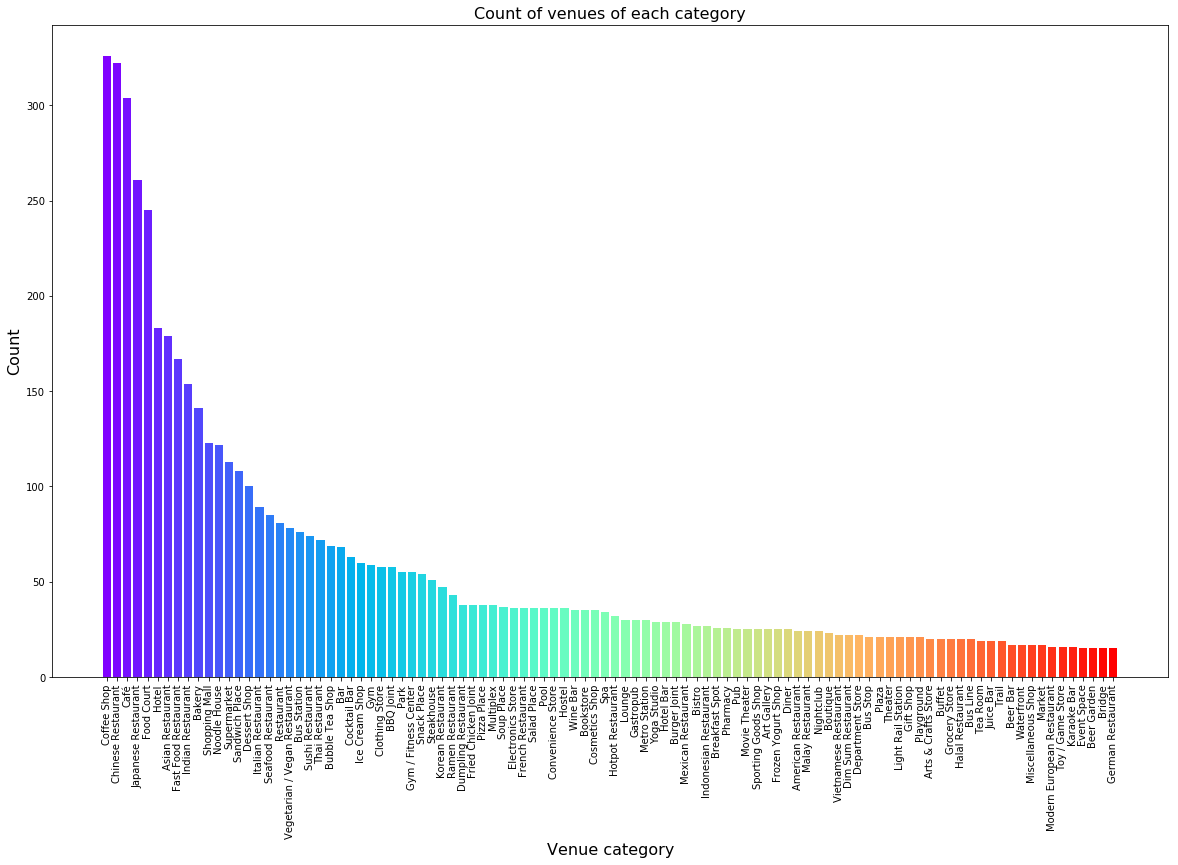

In [59]:
venue_distribution = downtown_venues['Venue Category'].value_counts().head(100)
colors2 = cm.rainbow(np.linspace(0, 1, len(venue_distribution.index)))

import matplotlib.pyplot as plt

plt.figure(figsize = (20, 12))
plt.xticks(rotation = 90)
plt.xlabel("Venue category", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues of each category", fontsize = 16)
plt.bar(venue_distribution.index, venue_distribution.values, color = colors2)

plt

Transforming the dataset

In [116]:
# one hot encoding
downtown_onehot = pd.get_dummies(downtown_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
downtown_onehot['STN_NAME'] = downtown_venues['STN_NAME'] 

# move neighborhood column to the first column
fixed_columns = [downtown_onehot.columns[-1]] + list(downtown_onehot.columns[:-1])
downtown_onehot = downtown_onehot[fixed_columns]

downtown_grouped = downtown_onehot.groupby('STN_NAME').mean().reset_index()
downtown_grouped.head()


,STN_NAME,Accessories Store,Airport,Airport Food Court,Airport Lounge,Airport Terminal,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Badminton Court,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bay,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Beijing Restaurant,Betting Shop,Bike Rental / Bike Share,Bike Trail,Bistro,Board Shop,Boarding House,Boat or Ferry,Bookstore,Border Crossing,Boutique,Bowling Alley,Bowling Green,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buddhist Temple,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Cafeteria,Café,Campground,Canal,Candy Store,Cantonese Restaurant,Casino,Cha Chaan Teng,Chinese Aristocrat Restaurant,Chinese Breakfast Place,Chinese Restaurant,Chocolate Shop,Church,Churrascaria,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Auditorium,College Cafeteria,College Gym,College Lab,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dive Shop,Doctor's Office,Dongbei Restaurant,Donut Shop,Dumpling Restaurant,Duty-free Shop,Electronics Store,English Restaurant,Event Space,Exhibit,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fishing Spot,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Hainan Restaurant,Hakka Restaurant,Halal Restaurant,Harbor / Marina,Health Food Store,High School,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hong Kong Restaurant,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Indoor Play Area,Intersection,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Laundromat,Light Rail Station,Lighthouse,Lighting Store,Lingerie Store,Lottery Retailer,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Mosque,Motel,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Outdoors & Recreation,Outlet Store,Pakistani Restaurant,Paper / Office Supplies Store,Park,Parking,Pastry Shop,Pedestrian Plaza,Peking Duck Restaurant,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Pie Shop,Pizza Place,Playground,Plaza,Pool,Pool Hall,Pop-Up Shop,Portuguese Restaurant,Post Office,Pub,Public Art,Racetrack,Ramen Restaurant,Recreation Center,Residential Building (Apartment / Condo),Resort,Restaurant,River,Road,Rock Climbing Spot,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Satay Restaurant,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,South Indian Restaurant,Southern / Soul Food

Print each MRT stations along with the top 10 most common venues

In [187]:
num_top_venues = 5

for hood in downtown_grouped['STN_NAME']:
    #print("----"+hood+"----")
    temp = downtown_grouped[downtown_grouped['STN_NAME'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    #print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    #print('\n')
    
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['STN_NAME']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['STN_NAME'] = downtown_grouped['STN_NAME']

for ind in np.arange(downtown_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(downtown_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,STN_NAME,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ADMIRALTY MRT STATION,Supermarket,Coffee Shop,Food Court,Bakery,Bus Station,Japanese Restaurant,Grocery Store,Food Stand,Food & Drink Shop,Food
1,ALJUNIED MRT STATION,Chinese Restaurant,Noodle House,Asian Restaurant,Café,Coffee Shop,Food Court,Vegetarian / Vegan Restaurant,Breakfast Spot,Dim Sum Restaurant,BBQ Joint
2,ANG MO KIO MRT STATION,Coffee Shop,Food Court,Dessert Shop,Japanese Restaurant,Bubble Tea Shop,Supermarket,Snack Place,Sushi Restaurant,Sandwich Place,Fried Chicken Joint
3,BAKAU LRT STATION,Basketball Court,Food Stand,Sandwich Place,Pharmacy,Supermarket,Japanese Restaurant,Sushi Restaurant,Dessert Shop,Shopping Mall,Fast Food Restaurant
4,BANGKIT LRT STATION,Food Court,Noodle House,Market,Park,Pharmacy,Miscellaneous Shop,Bus Station,Coffee Shop,Salon / Barbershop,Bike Trail


## Clustering with K-means

Run k-means to cluster the neighborhood.

In [188]:
# set number of clusters
kclusters = 7

downtown_grouped_clustering = downtown_grouped.drop('STN_NAME', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(downtown_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

downtown_merged = downtown_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
downtown_merged = downtown_merged.join(neighborhoods_venues_sorted.set_index('STN_NAME'), on='STN_NAME')

downtown_merged.head() # check the last columns!



,OBJECTID,STN_NAME,STN_NO,X,Y,Latitude,Longitude,MRT_line,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,12,ADMIRALTY MRT STATION,NS10,24402.1063,46918.1131,1.440585,103.800998,RED,6.0,Supermarket,Coffee Shop,Food Court,Bakery,Bus Station,Japanese Restaurant,Grocery Store,Food Stand,Food & Drink Shop,Food
1,16,ALJUNIED MRT STATION,EW9,33518.6049,33190.0020,1.316433,103.882893,GREEN,4.0,Chinese Restaurant,Noodle House,Asian Restaurant,Café,Coffee Shop,Food Court,Vegetarian / Vegan Restaurant,Breakfast Spot,Dim Sum Restaurant,BBQ Joint
2,33,ANG MO KIO MRT STATION,NS16,29807.2655,39105.7720,1.369933,103.849553,RED,2.0,Coffee Shop,Food Court,Dessert Shop,Japanese Restaurant,Bubble Tea Shop,Supermarket,Snack Place,Sushi Restaurant,Sandwich Place,Fried Chicken Joint
3,81,BAKAU LRT STATION,SE3,36026.0821,41113.8766,1.388093,103.905418,OTHERS,2.0,Basketball Court,Food Stand,Sandwich Place,Pharmacy,Supermarket,Japanese Restaurant,Sushi Restaurant,Dessert Shop,Shopping Mall,Fast Food Restaurant
4,80,BANGKIT LRT STATION,BP9,21248.2460,40220.9693,1.380018,103.772667,OTHERS,6.0,Food Court,Noodle House,Market,Park,Pharmacy,Miscellaneous Shop,Bus Station,Coffee Shop,Salon / Barbershop,Bike Trail


In [75]:
#downtown_merged.groupby(['Cluster Labels']).count()

,OBJECTID,STN_NAME,STN_NO,X,Y,Latitude,Longitude,MRT_line,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Cluster Labels,,,,,,,,,,,,,,,,,,
0.0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1.0,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
2.0,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122
3.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4.0,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34
5.0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
6.0,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17


In [204]:
#final_cluster = downtown_merged
final_cluster = downtown_merged.replace({3:0, 5:0, 6:0})
final_cluster.groupby(['Cluster Labels']).count()

final_cluster[['Cluster Labels']] = final_cluster[['Cluster Labels']].apply(np.int64)
final_cluster.drop(final_cluster[final_cluster['Cluster Labels']< 0].index, inplace=True)

final_cluster.groupby(['Cluster Labels']).count()


,OBJECTID,STN_NAME,STN_NO,X,Y,Latitude,Longitude,MRT_line,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Cluster Labels,,,,,,,,,,,,,,,,,,
0,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22
1,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
2,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122
4,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34


## Results and visualization



 Visualize the resulting clusters

In [205]:

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(final_cluster['Latitude'], final_cluster['Longitude'], final_cluster['STN_NAME'], final_cluster['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Cluster 1: 

<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

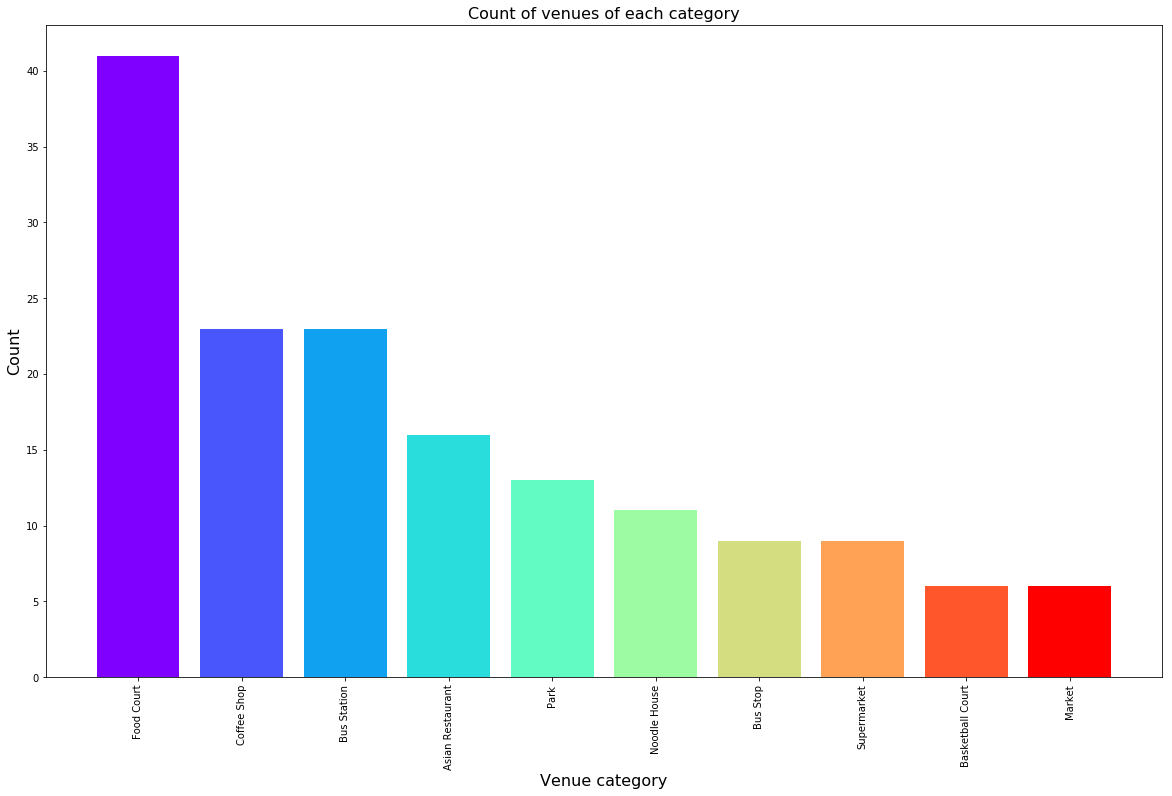

In [210]:

MRT_cluster1 = final_cluster.loc[final_cluster['Cluster Labels'] == 0, final_cluster.columns[[1] + list(range(5, final_cluster.shape[1]))]]

MRT_dist1 = MRT_cluster1[['STN_NAME','Cluster Labels']]
venue_dist1 = pd.merge (MRT_dist1, downtown_venues, on='STN_NAME')

venue_distribution = venue_dist1['Venue Category'].value_counts().head(10)
color2 = cm.rainbow(np.linspace(0, 1, len(venue_distribution.index)))

import matplotlib.pyplot as plt

plt.figure(figsize = (20, 12))
plt.xticks(rotation = 90)
plt.xlabel("Venue category", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues of each category", fontsize = 16)
plt.bar(venue_distribution.index, venue_distribution.values, color = colors2)

plt

#### Cluster 2

<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

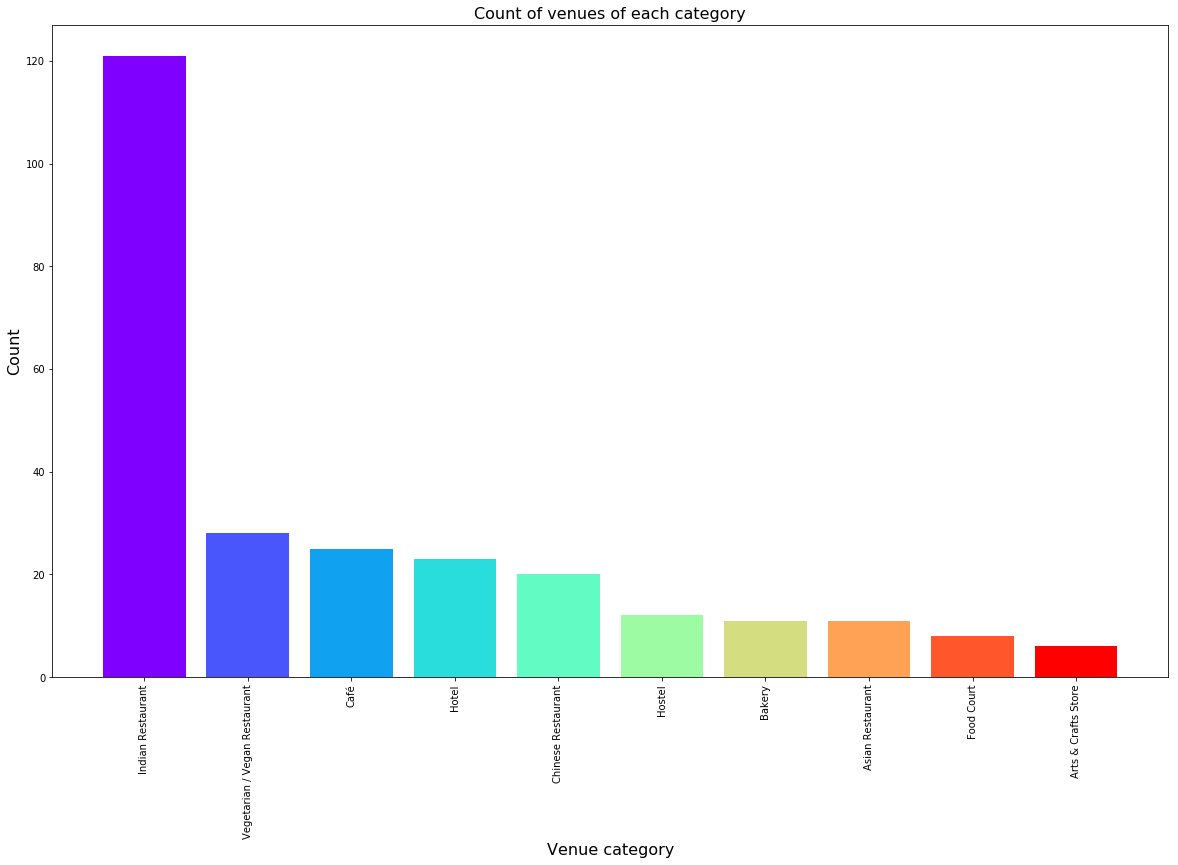

In [212]:

MRT_cluster2 = final_cluster.loc[final_cluster['Cluster Labels'] ==1, final_cluster.columns[[1] + list(range(5, final_cluster.shape[1]))]]

MRT_dist2 = MRT_cluster2[['STN_NAME','Cluster Labels']]
venue_dist2 = pd.merge (MRT_dist2, downtown_venues, on='STN_NAME')

venue_distribution = venue_dist2['Venue Category'].value_counts().head(10)
colors2 = cm.rainbow(np.linspace(0, 1, len(venue_distribution.index)))

import matplotlib.pyplot as plt

plt.figure(figsize = (20, 12))
plt.xticks(rotation = 90)
plt.xlabel("Venue category", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues of each category", fontsize = 16)
plt.bar(venue_distribution.index, venue_distribution.values, color = colors2)

plt

#### Cluster 3: 

<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

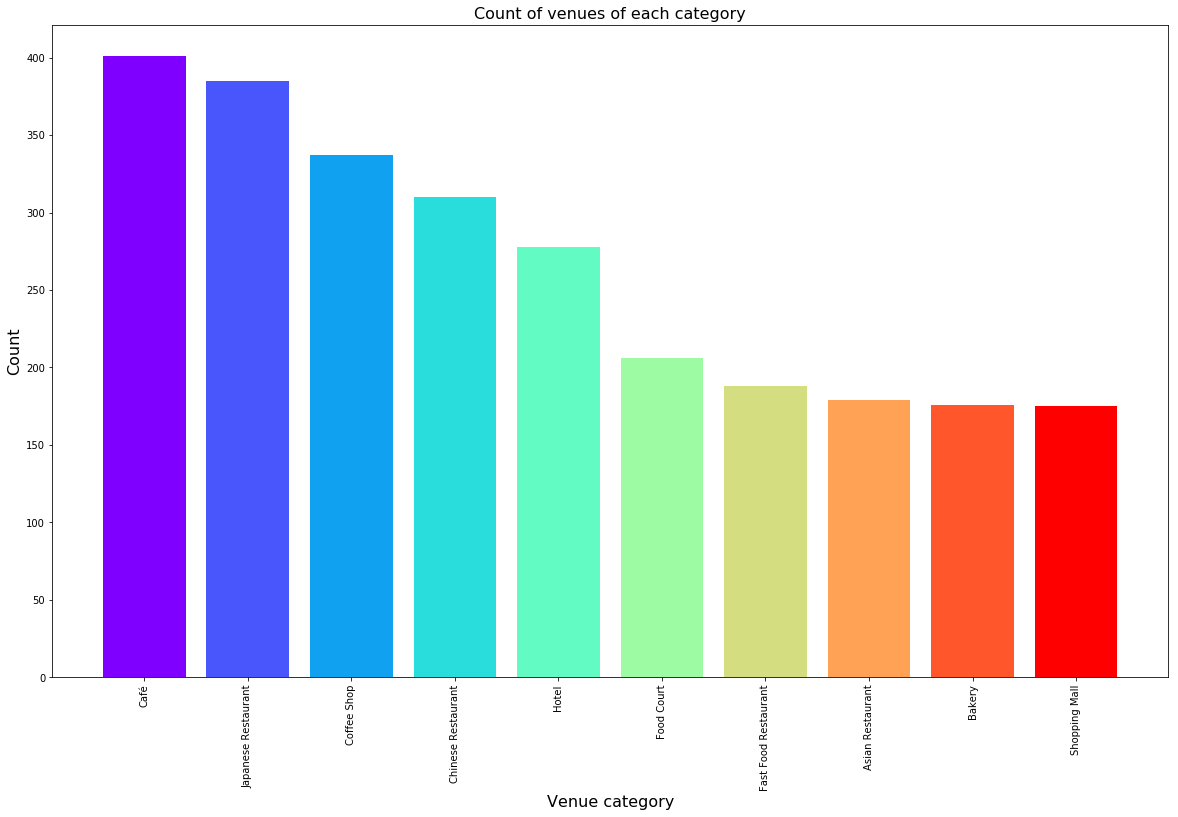

In [213]:

MRT_cluster3 = final_cluster.loc[final_cluster['Cluster Labels']  == 2, final_cluster.columns[[1] + list(range(5, final_cluster.shape[1]))]]

MRT_dist3 = MRT_cluster3[['STN_NAME','Cluster Labels']]
venue_dist3 = pd.merge (MRT_dist3, downtown_venues, on='STN_NAME')

venue_distribution = venue_dist3['Venue Category'].value_counts().head(10)
colors2 = cm.rainbow(np.linspace(0, 1, len(venue_distribution.index)))

import matplotlib.pyplot as plt

plt.figure(figsize = (20, 12))
plt.xticks(rotation = 90)
plt.xlabel("Venue category", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues of each category", fontsize = 16)
plt.bar(venue_distribution.index, venue_distribution.values, color = colors2)

plt


#### Cluster 4: 

<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

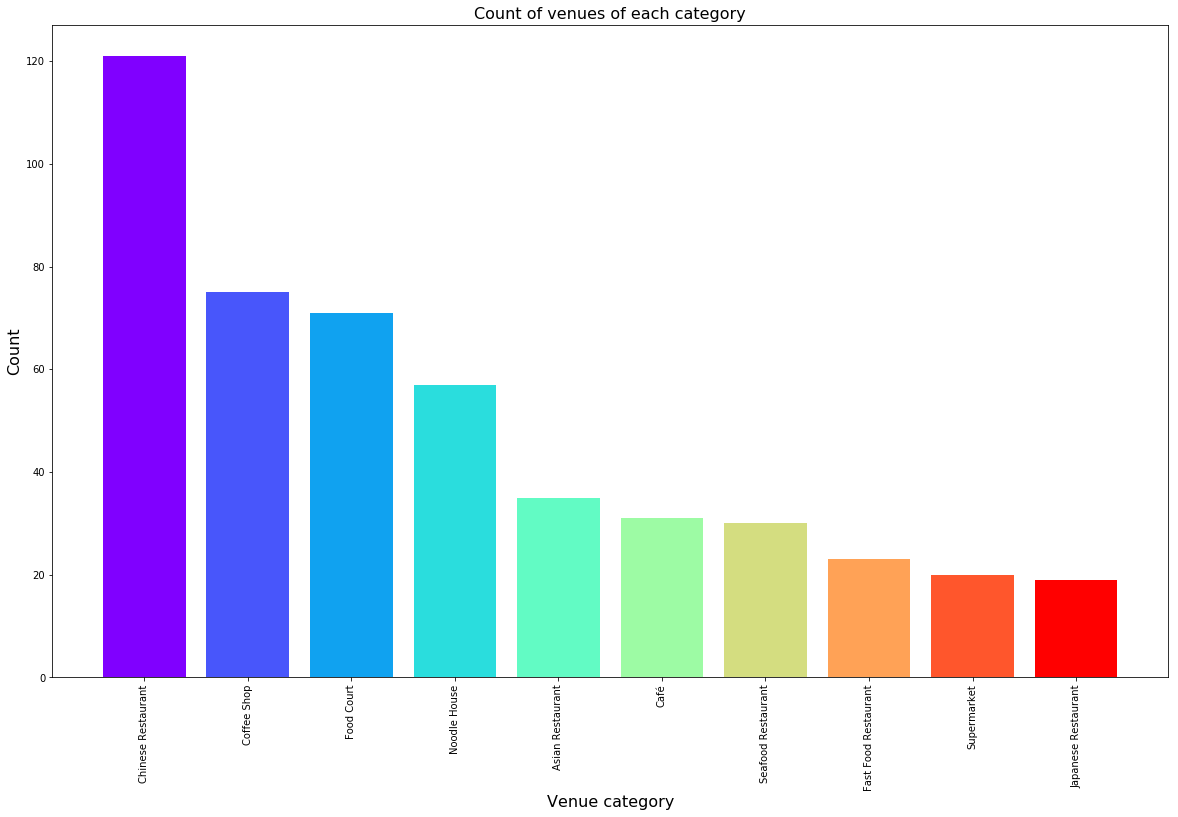

In [214]:

MRT_cluster4 = final_cluster.loc[final_cluster['Cluster Labels'] ==4, final_cluster.columns[[1] + list(range(5, final_cluster.shape[1]))]]

MRT_dist4 = MRT_cluster4[['STN_NAME','Cluster Labels']]
venue_dist4 = pd.merge (MRT_dist4, downtown_venues, on='STN_NAME')

venue_distribution = venue_dist4['Venue Category'].value_counts().head(10)
colors2 = cm.rainbow(np.linspace(0, 1, len(venue_distribution.index)))

import matplotlib.pyplot as plt

plt.figure(figsize = (20, 12))
plt.xticks(rotation = 90)
plt.xlabel("Venue category", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues of each category", fontsize = 16)
plt.bar(venue_distribution.index, venue_distribution.values, color = colors2)

plt



## Discussion

From the clustering results above, let's have a more detail analysis on the characteristics of each cluster.

#### Cluster 1: Residential area

The top 5 most frequent venues in this cluster are Foodcourt, Coffee shop, Bus station, Asian restaurant, Park. 
These MRT stations should be near to the residential area.


#### Cluster 2: Tourist area

The top 5 most frequent venues in this cluster are Indian restaurant, Vegetarian restaurant, Cafe, Hotel, Chinese restaurant. These MRT stations should be near to tourist areas.


#### Cluster 4: Tourist area

The top 5 most frequent venues in this cluster are Cafe, Japanese restaurant, Coffee shop, Chinese restaurant, Hotel. These MRT stations should be near to tourist areas.


#### Cluster 3: Restaurants

The top 5 most frequent venues in this cluster are Chinese Restaurant, Coffee Shop, Food Court, Noodle House, Asian Restaurant. These are the MRT stations near to the restaurants.


In conclustion, Cluster 1 seems to have venues where most local residents frequently visit. Hence, it should be the segment with potential for the business owners to open the Kaya toast outlets.

This segment consists 21 MRT stations (shortlisted from the initial list of total 187 MRT stations in Singapore).




In [220]:
shortlist = pd.DataFrame(MRT_cluster1[['STN_NAME']].groupby(['STN_NAME']).count())
#shortlist.shape[0]

## Conclusion

In this study, we aim to identify the potential MRT stations in Singapore where most frequent passengers are local residents in order to open the Kaya Toast outlets. The analysis approach is segmenting the MRT stations through clustering technique based on analyzing the most frequent venues near to MRT stations.

From the clustering results, we have identified a segment where the most frequent venues are those that most local residents frequently visit, such as: coffee shop, food court, fast food restaurant, bus station, supermarket, etc. This segment consists 21 MRT stations (shortlisted from the initial list of total 187 MRT stations in Singapore) to open the Kaya toast outlets. 

The business owners can use the result of our analysis as a baseline to proceed with the next steps, which are to find the rental price and the availability of rental venues at these 21 shortlisted MRT stations.
